# Figures 3bcd from Oliva et al. (2019)

Here we reproduce the results from figure 3b in Oliva et al. (2019). Oliva et al. plotted the error for each of 10 agents simulated on a graph with 40 nodes and 161 edges for 1000 steps, whereby agents took actions following a Poisson process with rate 1.

## Imports

In [59]:
from operator import add
from exp_oliva_fig3b import run_simulation

import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fig. 3b: Agent errors versus number of iterations

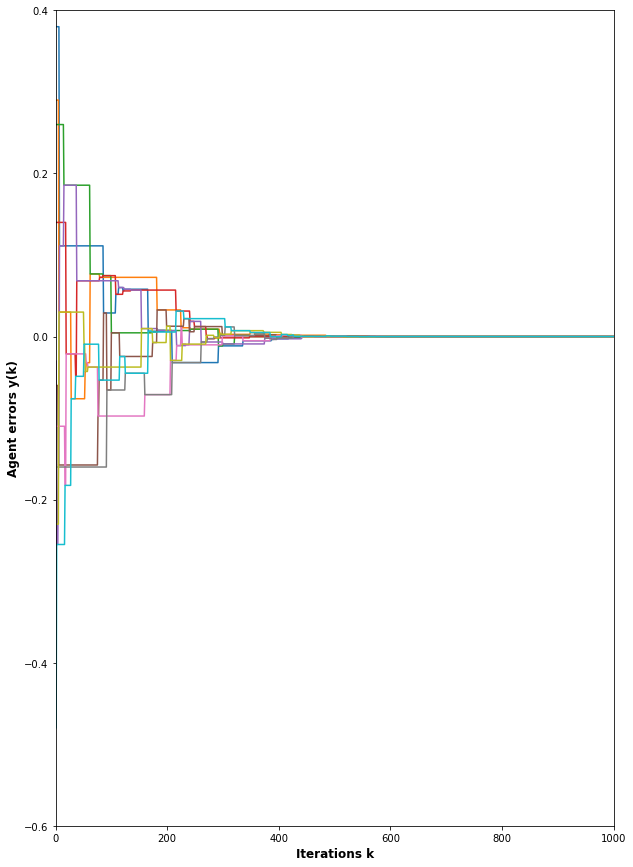

In [61]:
# parameters (from Oliva et al. (2019))
no_agents = 10
init_val = [0.38, 0.29, 0.26, 0.14, -0.03, -0.06, -0.11, -0.16, -0.23, -0.48]
graph_type = 'Gnm'
graph_size = 40 # n
edge_number = 161 # m
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_steps = 1000

run_simulation(no_agents, graph_type, graph_size, edge_number, init_val, clock_rate, simulation_steps)

By reproducing the results from Oliva et al. we validated our simulation. Individual agent errors disappear over time as the agents average estimates and converge to the initial mean. Please note that in figure 3b from Oliva et al. as well as here we are only looking at a single realization. Convergence times might vary sligthly due to the randomness of the underlying graph and the agents movements and interactions. 

## Fig. 3c: Empirical mean error over 500 realizations

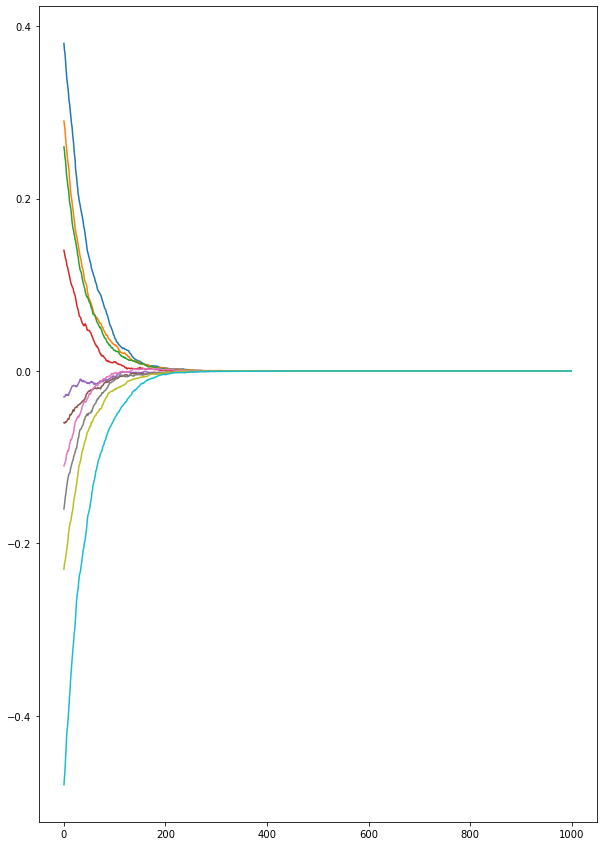

In [35]:
# parameters (from Oliva et al. (2019))
no_agents = 10
init_val = [0.38, 0.29, 0.26, 0.14, -0.03, -0.06, -0.11, -0.16, -0.23, -0.48]
graph_type = 'Gnm'
graph_size = 40 # n
edge_number = 161 # m
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_steps = 1000

multi_sim = True

no_sim = 500
err_all = [[0]*simulation_steps for n in range(no_agents)]
for sim in range(no_sim):
    (err_t, var_t) = run_simulation(no_agents, graph_type, graph_size, edge_number, init_val, clock_rate, simulation_steps, multi_sim)
    for n in range(no_agents):
        err_all[n] = list(map(add, err_all[n], err_t[n]))    

fig = plt.figure(figsize=(10,15))
for n in range(no_agents):
    err_all[n] = list(map(lambda x: x/no_sim, err_all[n])) 
    plt.plot(list(range(simulation_steps)), err_all[n])

## Fig. 3d: Empirical error variance over 500 realizations

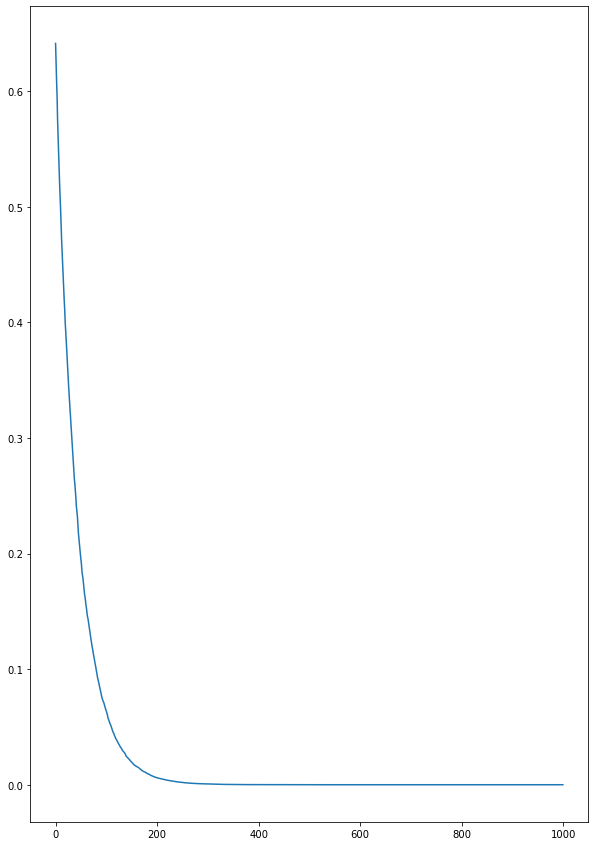

In [55]:
# parameters (from Oliva et al. (2019))
no_agents = 10
init_val = [0.38, 0.29, 0.26, 0.14, -0.03, -0.06, -0.11, -0.16, -0.23, -0.48]
graph_type = 'Gnm'
graph_size = 40 # n
edge_number = 161 # m
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_steps = 1000

multi_sim = True

no_sim = 500
var_all = [0]*simulation_steps
for sim in range(no_sim):
    (err_t, var_t) = run_simulation(no_agents, graph_type, graph_size, edge_number, init_val, clock_rate, simulation_steps, multi_sim)
    var_all = list(map(add, var_all, var_t))    

fig = plt.figure(figsize=(10,15))
var_all = list(map(lambda x: x/no_sim*no_agents, var_all)) 
plt.plot(list(range(simulation_steps)), var_all)